In [7]:
import os
import glob
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

def compute_pixel_share(input_folder: str, output_csv: str, pattern: str = 'scene_*_synthetic_gaussian.tiff'):
    """
    Reads all TIFF files matching `pattern` in `input_folder`, computes the proportion
    of pixels == 1 in each, writes results to `output_csv`, and plots a histogram.
    
    Parameters
    ----------
    input_folder : str
        Path to the folder containing your TIFF files.
    output_csv : str
        Path where the CSV of results will be saved.
    pattern : str, optional
        Glob pattern to select TIFF files (default is 'scene_*_synthetic_gaussian.tiff').
        
    Returns
    -------
    pandas.DataFrame
        DataFrame with columns ['filename', 'share_one'].
    """
    # find all matching TIFFs
    file_paths = glob.glob(os.path.join(input_folder, pattern))
    records = []

    for path in file_paths:
        # load as NumPy array
        img = Image.open(path)
        arr = np.array(img)
        
        total_pixels = arr.size
        ones = int((arr == 255).sum())
        share = ones / total_pixels
        
        records.append({
            'filename': os.path.basename(path),
            'share_one': share
        })

    # build DataFrame and save
    df = pd.DataFrame.from_records(records)
    df.to_csv(output_csv, index=False)
    print(f"Wrote results for {len(df)} files to {output_csv!r}")

    # plot histogram
    plt.figure()
    plt.hist(df['share_one'], bins=50)
    plt.xlabel('Share of pixels == 1')
    plt.ylabel('Number of TIFFs')
    plt.title('Histogram of pixel-share==1 across scenes')
    plt.tight_layout()
    plt.show()
    
    return df


Wrote results for 3566 files to 'pixel_shares.csv'


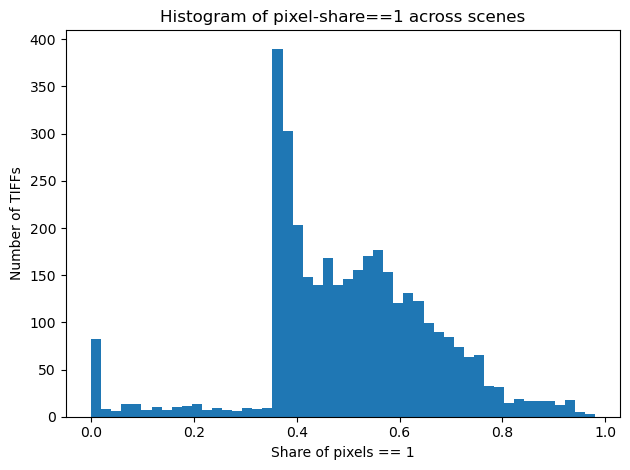

In [8]:
# Example usage:
df = compute_pixel_share('/Users/sayedmorteza/Library/CloudStorage/Box-Box/Caltech Research/Scripts/ImageTRT/Synthetic Data Generation/Results/Treatment', 'pixel_shares.csv')

Wrote results for 500 files to 'pixel_shares_3.csv'


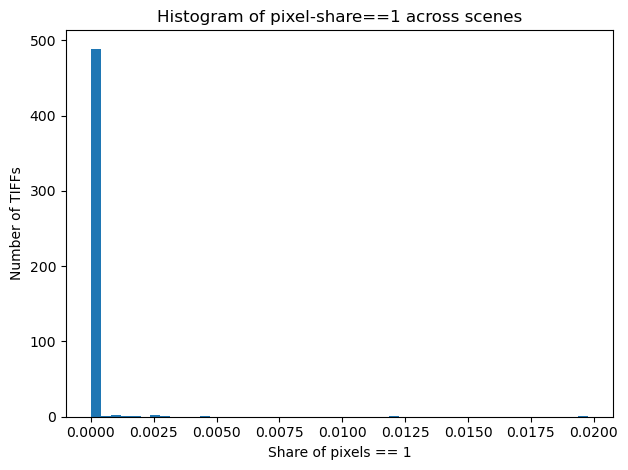

In [16]:
# Example usage:
df = compute_pixel_share('/Users/sayedmorteza/Desktop/Treatment/Treatment', 'pixel_shares_3.csv')


In [ ]:
import pandas as pd
tab = pd.read_csv('/Users/sayedmorteza/Desktop/Treatment')

In [10]:
tab.head()

,Unnamed: 0,scene,CLAIMS_1996_SUM,CLAIMS_2016_SUM,WETLAND_DEV_1996_2016_SHARE,WETLAND_DEV_1996_2016_HECTARES,CAPITAL_1996_SUM,CAPITAL_1996_SD,CAPITAL_2016_SUM,CAPITAL_2016_SD,...,ECO_818,ECO_819,ECO_821,ECO_822,ECO_823,ECO_824,ECO_825,ECO_826,ECO_827,ECO_828
0,1,1,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,2,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3,3,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,4,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5,5,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [11]:
tab.columns

Index(['Unnamed: 0', 'scene', 'CLAIMS_1996_SUM', 'CLAIMS_2016_SUM',
       'WETLAND_DEV_1996_2016_SHARE', 'WETLAND_DEV_1996_2016_HECTARES',
       'CAPITAL_1996_SUM', 'CAPITAL_1996_SD', 'CAPITAL_2016_SUM',
       'CAPITAL_2016_SD', 'CCAP_1996_NoData', 'CCAP_1996_DevelopedMH',
       'CCAP_1996_DevelopedLO', 'CCAP_1996_Agriculture', 'CCAP_1996_LowVeg',
       'CCAP_1996_Forest', 'CCAP_1996_Wetland', 'CCAP_1996_ShoreBare',
       'CCAP_1996_Water', 'CCAP_2016_NoData', 'CCAP_2016_DevelopedMH',
       'CCAP_2016_DevelopedLO', 'CCAP_2016_Agriculture', 'CCAP_2016_LowVeg',
       'CCAP_2016_Forest', 'CCAP_2016_Wetland', 'CCAP_2016_ShoreBare',
       'CCAP_2016_Water', 'DEM_MEAN', 'DEM_SD', 'DTW_MEAN', 'DTW_SD',
       'ECO_MODE', 'FLD_FREQ_MEAN', 'FLD_FREQ_SD', 'HYDRIC_MEAN', 'HYDRIC_SD',
       'NDH_Canal', 'NDH_Coastline', 'NDH_Pipeline', 'NDH_Stream',
       'NDH_StreamOrder_0', 'NDH_StreamOrder_1', 'NDH_StreamOrder_2',
       'NDH_StreamOrder_3plus', 'NDH_LowFlow', 'NDH_HighFlow',
       

In [12]:
tab = tab[['scene', 'WETLAND_DEV_1996_2016_SHARE']]

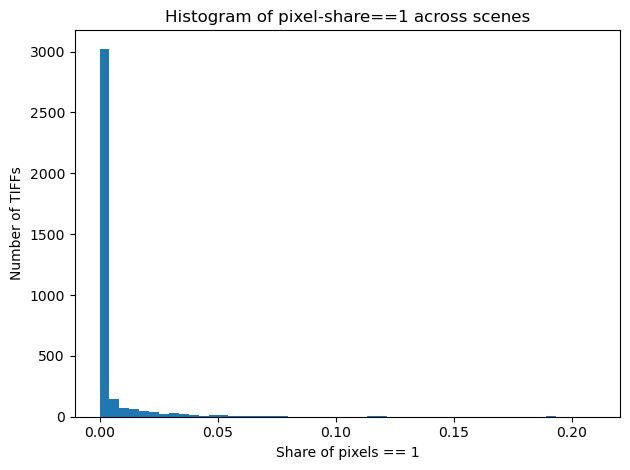

In [13]:
 
plt.figure()
plt.hist(tab['WETLAND_DEV_1996_2016_SHARE'], bins=50)
plt.xlabel('Share of pixels == 1')
plt.ylabel('Number of TIFFs')
plt.title('Histogram of pixel-share==1 across scenes')
plt.tight_layout()
plt.show()

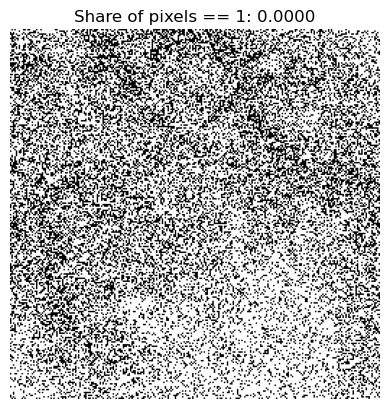

Share of pixels == 1: 0.0000
Total pixels: 65536, Pixels == 1: 0


In [3]:
path = '/Users/sayedmorteza/Library/CloudStorage/Box-Box/Caltech Research/Scripts/ImageTRT/Synthetic Data Generation/Results/Treatment'
pattern = 'scene_1_synthetic_gaussian.tiff'
file_paths = glob.glob(os.path.join(path, pattern))
img = Image.open(file_paths[0])
arr = np.array(img)
total_pixels = arr.size
ones = int((arr == 1).sum())
share = ones / total_pixels
# show image
plt.imshow(arr, cmap='gray')
plt.title(f'Share of pixels == 1: {share:.4f}')
plt.axis('off')
plt.show()
print(f"Share of pixels == 1: {share:.4f}")
print(f"Total pixels: {total_pixels}, Pixels == 1: {ones}")
        

In [6]:
arr

array([[255,   0, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [  0, 255,   0, ..., 255,   0, 255],
       ...,
       [  0, 255, 255, ..., 255,   0, 255],
       [  0, 255,   0, ..., 255, 255,   0],
       [255,   0, 255, ..., 255, 255, 255]], dtype=uint8)